**Exploratory Data Analysis (EDA) and Visualization Project**

**Objective:** 

Conduct an exploratory data analysis to understand the key patterns and insights from the dataset.


**Tasks:**
a) Load the dataset and clean any missing or inconsistent data.

b) Generate summary statistics for numerical columns (e.g., average stress levels, distribution of age

c) Visualize the distributions of key columns using histograms, box plots, and bar charts)

d) Create correlation heatmaps to find relationships between numerical variables

e) Visualize the proportion of respondents experiencing mental health challenges (e.g., pie charts or bar charts for categorical data)


**Steps:**

i) Load and clean the data

ii) Summary statistics and visualizations for numeric and categorical data.
iii) Correlation Analysis


In [1]:
# Just run this, it will be used somewhere
def age_grouping(row):
    if row.Age <= 25:
         return '20 to 25'

    elif row.Age <= 30:
        return '26 to 30'

    elif row.Age <= 35:
        return '31 to 35'

    elif row.Age <= 40:
        return '36 to 40'

    elif row.Age <= 45:
        return '41 to 45'

    elif row.Age <= 50:
        return '46 to 50'

    elif row.Age <= 55:
        return '51 to 55'

    elif row.Age <= 60:
        return '56 to 60'
    else:
        return 'Over 60'

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the data
data_df=pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")

In [4]:
# 1. Clean the data
#Check missing values and drop them
data_df_cleaned=data_df.dropna()
dropped=data_df.shape[0]-data_df_cleaned.shape[0]
print(f"{(dropped/data_df.shape[0])*100}% of the rows have been dropped")

48.46% of the rows have been dropped


In [5]:
#Show summary stats
print(f"Summary stats: \n {data_df_cleaned.Age.describe()}")

Summary stats: 
 count    2577.000000
mean       40.910749
std        11.258183
min        22.000000
25%        31.000000
50%        41.000000
75%        51.000000
max        60.000000
Name: Age, dtype: float64


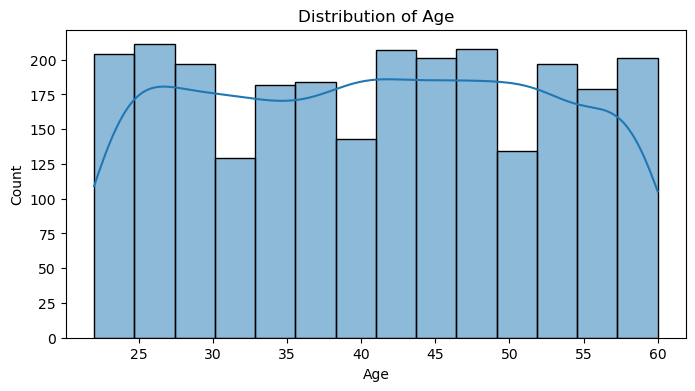

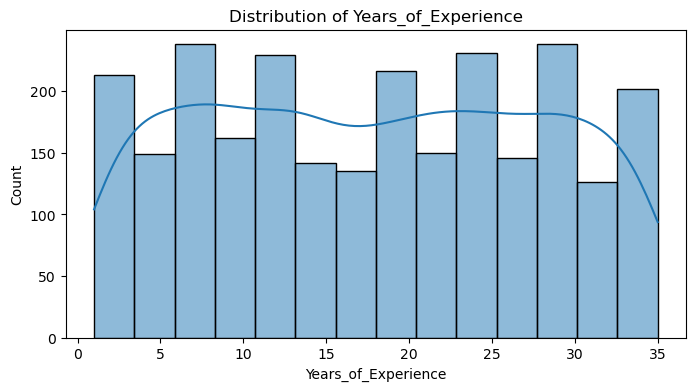

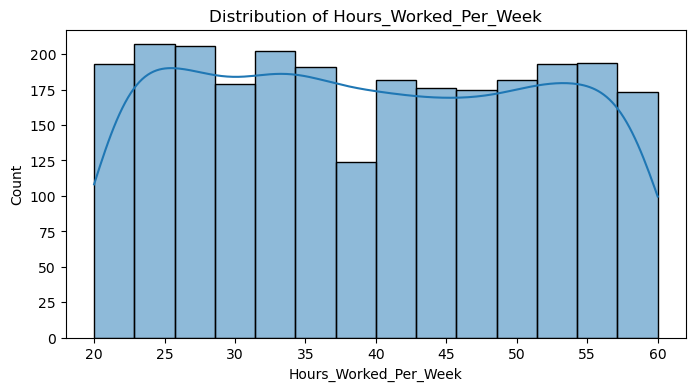

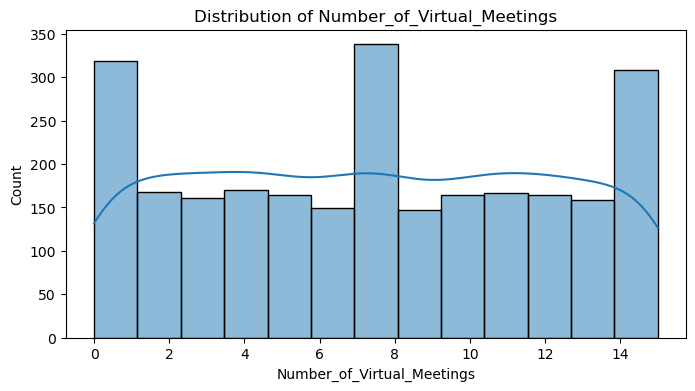

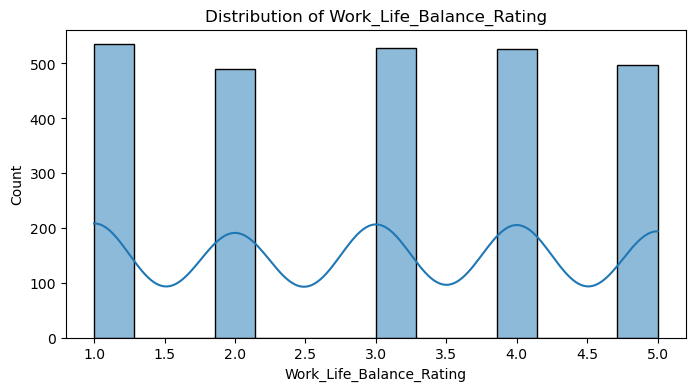

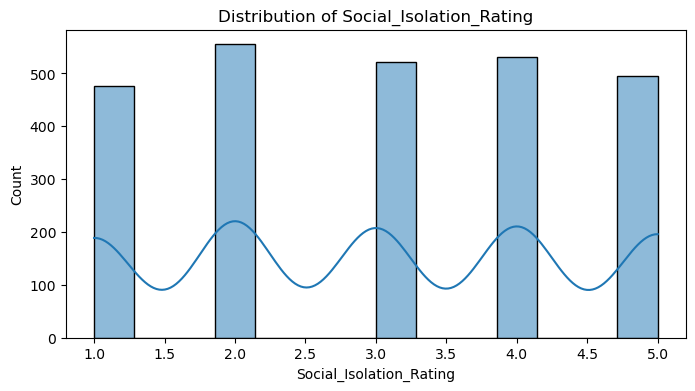

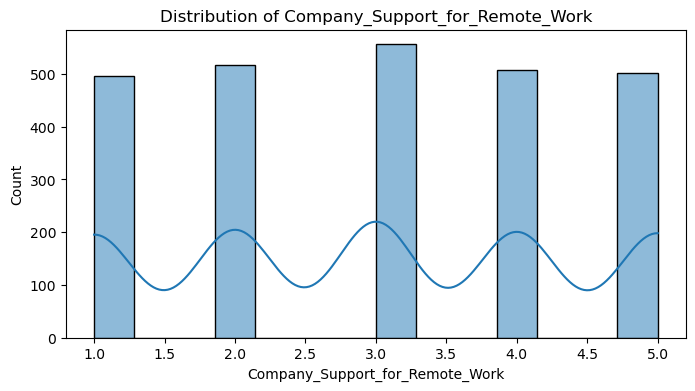

In [6]:
#2. Distribution analysis
#Lets use histograms in columns with numerical values
numbered_cols=data_df_cleaned.select_dtypes(include=[np.number]).columns
for col in numbered_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data_df_cleaned[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

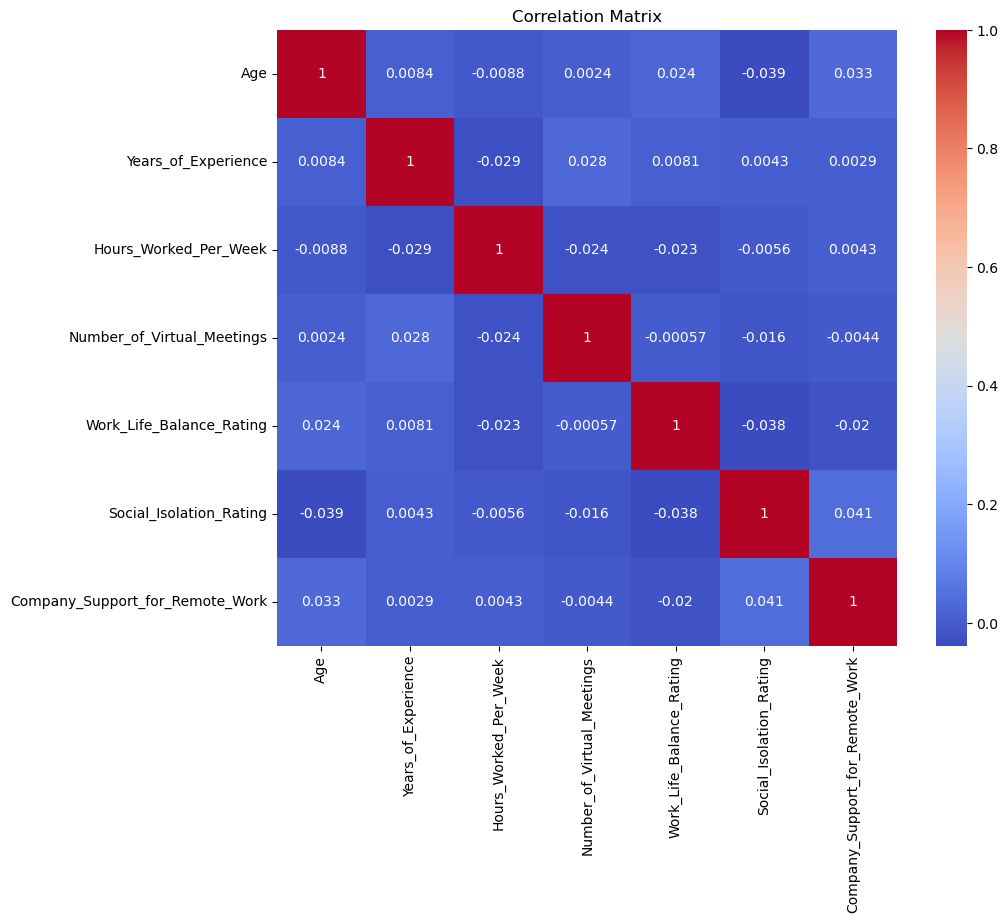

In [7]:
#3. Correlation Analysis
# Heatmap for correlation among numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(data_df_cleaned[numbered_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Comparative Analysis of Mental Health Impact by Demographics**

**Objective:**

Analyze how mental health is affected across different demographic groups such as age, gender, or job role.

**Tasks:**

a) Segment the dataset by different demographic columns (e.g., age groups, gender).

b) 	Calculate the average mental health scores or other relevant metrics for each group

c) o	Use box plots and bar charts to compare mental health impact across group

d) 
o	Analyze if remote work has different impacts on mental health for different demographics using groupby and aggregation functio

**Steps:**

i) Segment data by demographic columns.

ii) Calculate and visualize average mental health metrics for each demographic group.

iii) Compare mental health metrics across demographics.s.


In [8]:
data_df_cleaned = data_df_cleaned.copy()
data_df_cleaned['index'] = data_df_cleaned.index

In [9]:
data_df_cleaned_copy = data_df_cleaned.copy()
data_df_cleaned_copy['Age_Group'] = data_df_cleaned.apply(age_grouping, axis='columns')

In [10]:
data_df_cleaned=data_df_cleaned.set_index('index')
data_df_cleaned_copy=data_df_cleaned_copy.set_index('index')
data_df_cleaned.head(5)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
index,,,,,,,,,,,,,,,,,,,,
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America
12,EMP0013,40,Female,Marketing,Consulting,1,Remote,21,7,2,High,Depression,Yes,Decrease,2,Neutral,1,Weekly,Good,Europe


In [11]:
# Ensure both DataFrames have the same length
if len(data_df_cleaned_copy) == len(data_df_cleaned):
    same_index_count = sum(data_df_cleaned.index == data_df_cleaned_copy.index)
else:
    print("Rows in data 1 and data 2 are not equal")

In [12]:
print("{} % merged".format((same_index_count/data_df_cleaned.shape[0])*100))

100.0 % merged


In [13]:
age_group = data_df_cleaned_copy['Age_Group']

In [14]:
data_df_cleaned = data_df_cleaned.join(data_df_cleaned_copy['Age_Group'], rsuffix='_Data1')

In [15]:
data_df_cleaned['Age_Group_Data1']=data_df_cleaned['Age_Group']

In [16]:
data_df_cleaned.drop('Age_Group_Data1', axis=1).columns

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region', 'Age_Group'],
      dtype='object')

In [17]:
data_df_cleaned['Mental_Health_Score'] = np.where(
    ((data_df_cleaned.Mental_Health_Condition.isin(['Anxiety', 'Burnout', 'Depression'])) &
     (data_df_cleaned.Access_to_Mental_Health_Resources == 'Yes')), 5,
    np.where(
        ((data_df_cleaned.Mental_Health_Condition.isin(['Anxiety', 'Burnout', 'Depression'])) &
         (data_df_cleaned.Access_to_Mental_Health_Resources == 'No')), 0,
        None
    )
)

In [18]:
# I have used apply() because I need to handle specific logic for each element
data_df_cleaned['Mental_Health_Score'] = data_df_cleaned['Mental_Health_Score'].apply(lambda x: int(x) if not pd.isnull(x) else None)
data_df_cleaned.Mental_Health_Score.dtype

dtype('int64')

In [19]:
# Segmentation by demographics and calculation of mental health metrics
# Assuming "Age Group", "Gender", and "Job Role" columns exists and "Mental_Health_Score" 
# is a key metric

# Segment by Age Group and Gender, then get the average mental health scores
ageGenderMean=data_df_cleaned.groupby(["Age_Group","Gender"])["Mental_Health_Score"].mean().unstack()
print("Average Mental Health Scores by Age Group and Gender:\n", ageGenderMean)

Average Mental Health Scores by Age Group and Gender:
 Gender       Female      Male  Non-binary  Prefer not to say
Age_Group                                                   
20 to 25   2.443182  2.651515    2.538462           2.222222
26 to 30   2.250000  2.526316    2.619048           3.028169
31 to 35   2.628205  2.115385    2.440476           2.394366
36 to 40   2.303371  2.191781    2.441860           2.784810
41 to 45   1.935484  2.531646    2.228916           2.872340
46 to 50   2.371795  2.555556    2.088608           3.023256
51 to 55   2.066667  2.467532    2.678571           2.243590
56 to 60   2.349398  2.530120    2.012987           2.670455


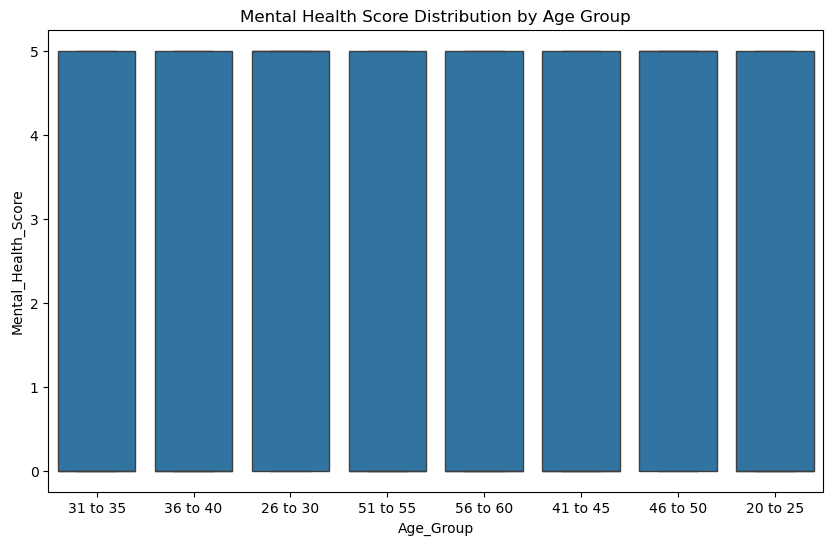

In [20]:
#2. Box plots for comparing mental health scores across age groups
plt.figure(figsize=(10,6))
sns.boxplot(x='Age_Group', y='Mental_Health_Score', data=data_df_cleaned)
plt.title("Mental Health Score Distribution by Age Group")
plt.show()

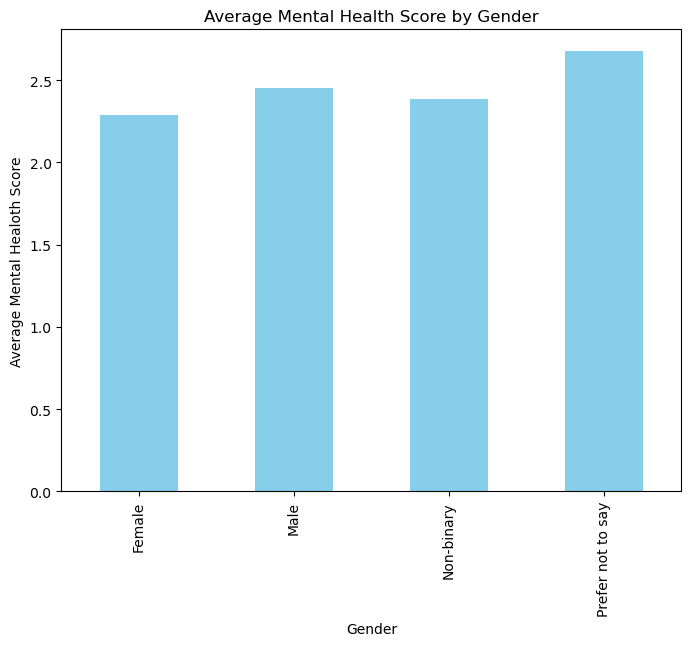

In [21]:
#3. Bar chart to cmpare average mental health scores by gender
genderMeans=data_df_cleaned.groupby("Gender")["Mental_Health_Score"].mean()
genderMeans.plot(kind='bar', color='skyblue',figsize=(8,6))
plt.title("Average Mental Health Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Mental Healoth Score")
plt.show()

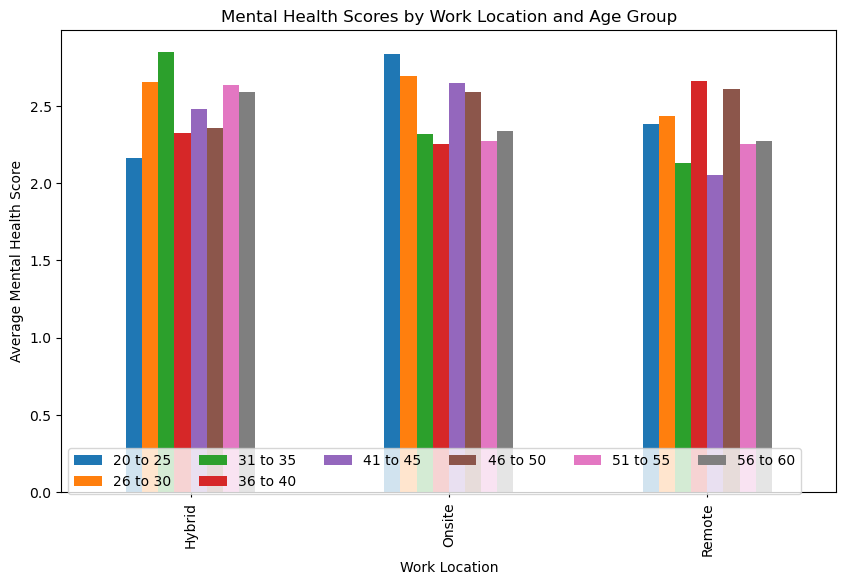

In [25]:
#4. Impact of Remote Work on mental Health Across Demographics
remoteVsOffice_work=data_df_cleaned.groupby(["Work_Location","Age_Group"])["Mental_Health_Score"].mean().unstack()
remoteVsOffice_work.plot(kind='bar',stacked=False,figsize=(10,6))
plt.title("Mental Health Scores by Work Location and Age Group")
plt.legend(loc='lower left', bbox_to_anchor=(0, -0.02), ncol=6)
plt.xlabel("Work Location")
plt.ylabel("Average Mental Health Score")
plt.savefig('scores_Graph.png')
plt.show()